# Onderzoeksvraag 2

1. **Wat is de invloed van het weer op de hoeveelheid taxi ritten**

- <a href="#importeren">Librarys importeren</a>
- <a href="#Data_analyse">Data-analyse</a>
- <a href="#Conclusie">Conclusie</a>

<a id ="importeren"></a>
## Importeren

In [34]:
import matplotlib.pyplot as plt
from windrose import WindroseAxes
import numpy as np
import pandas as pd

We gaan nu kijken naar de correlatie tussen de taxi prijzen en het weer op dat moment van de tickets.

In [2]:
data = pd.read_csv("taxi_dataset.csv")
data.head()

,id,name,price,surge_multiplier,timestamp,datetime,timezone,source,destination,latitude,longitude,distance
0,009e9c53-074d-43cf-aef2-0fbc7a47ed3d,UberXL,12.0,1.0,1.543616e+09,2018-11-30 22:13:01,America/New_York,North End,West End,42.3647,-71.0542,1.11
1,23f145da-f0c1-4d1f-a184-496bc003a7db,Black,16.0,1.0,1.544698e+09,2018-12-13 10:50:11,America/New_York,North End,West End,42.3647,-71.0542,1.11
2,357559cb-8c58-4278-a41a-e33b2e0997a3,UberX,7.5,1.0,1.544729e+09,2018-12-13 19:15:03,America/New_York,North End,West End,42.3647,-71.0542,1.11
3,50ef1165-9d23-416c-a65c-18906207b295,WAV,7.5,1.0,1.545005e+09,2018-12-16 23:55:11,America/New_York,North End,West End,42.3647,-71.0542,1.11
4,91c4861c-1780-42b0-bca1-bbd64a422cc3,Black SUV,26.0,1.0,1.544748e+09,2018-12-14 00:40:07,America/New_York,North End,West End,42.3647,-71.0542,1.11


<a id ="#Data_analyse"></a>
## Data analyse

In [3]:
# Check how many days are in the dataset
data["datetime"] = pd.to_datetime(data["datetime"])
print(f"There are {data["datetime"].dt.date.nunique()} days in the dataset")

There are 17 days in the dataset


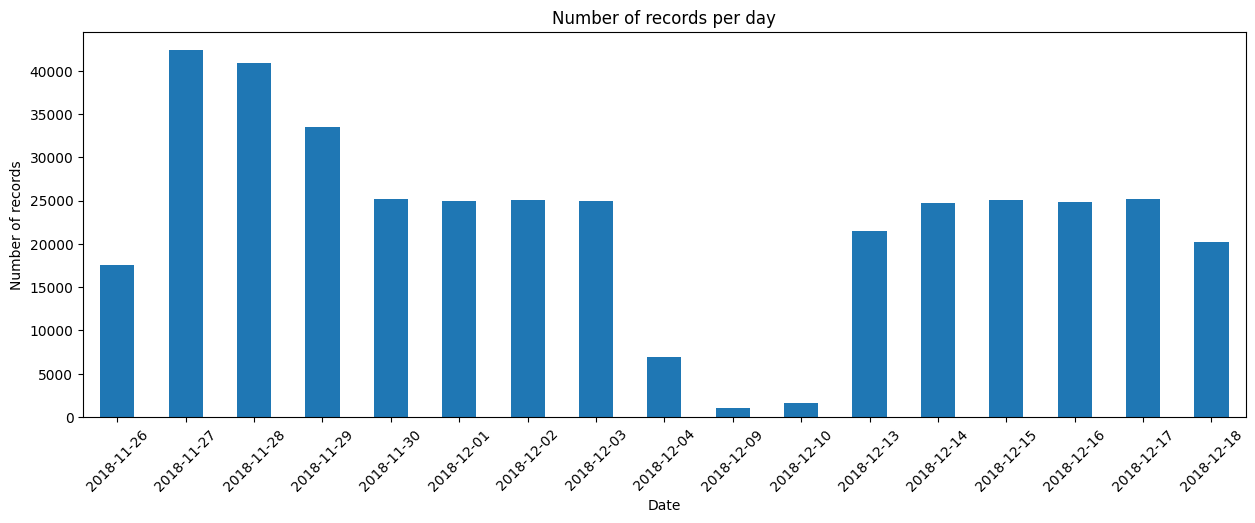

In [4]:
#plot the days in the dataset
data["datetime"].dt.date.value_counts().sort_index().plot(kind="bar", figsize=(15, 5))
plt.title("Number of records per day")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Number of records")
plt.show()

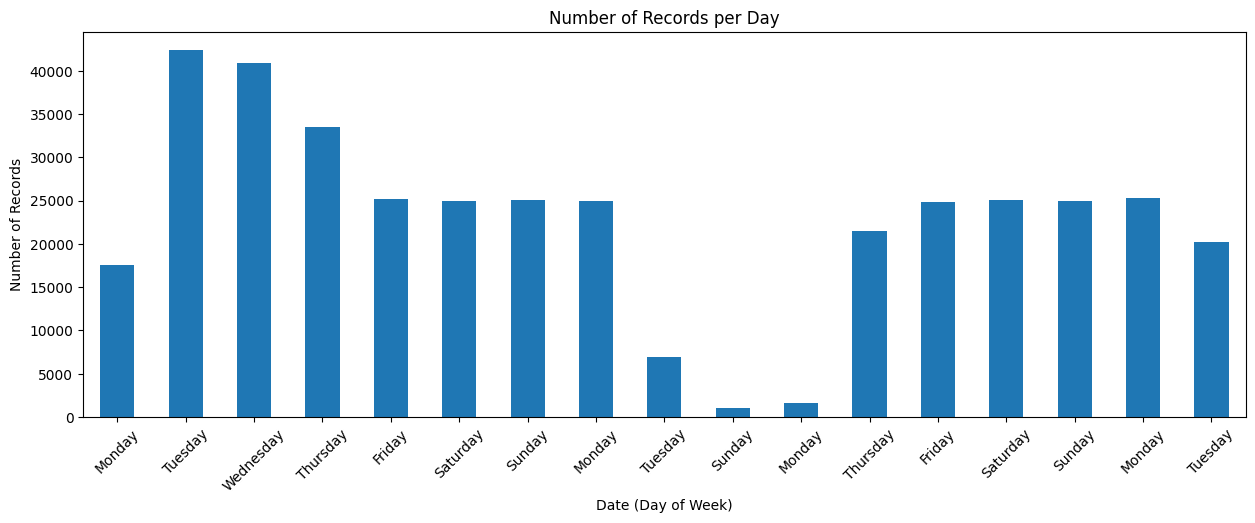

In [40]:
# Get the number of records per day
daily_counts = data["datetime"].dt.date.value_counts().sort_index()
# Get the weekday labels
weekday_labels = [date.strftime("%A") for date in daily_counts.index]

fig, ax = plt.subplots(figsize=(15, 5))
daily_counts.plot(kind="bar", ax=ax)
ax.set_xticklabels(weekday_labels, rotation=45)
ax.set_xlabel("Date (Day of Week)")
ax.set_ylabel("Number of Records")
ax.set_title("Number of Records per Day")

plt.show()

Uit deze bar plot kunnen we zien dat de dataset maar spreid over 17 dagen. We zien ook dat op maandag, zondag en dinsdag op bepaalde dagen minder ritten zijn. 

In [5]:
# Check how many differrent regions are in the dataset
# using the latitude and longitude
print(f"There are {data["latitude"].nunique()} unique latitude values")
print(f"There are {data["longitude"].nunique()} unique longitude values")

# Check how many differrent regions are in the dataset
# usign the source and destination 
print(f"There are {data["source"].nunique()} unique source values")
print(f"There are {data["destination"].nunique()} unique destination values")

There are 11 unique latitude values
There are 12 unique longitude values
There are 12 unique source values
There are 12 unique destination values


Hier kunnen we zien dat de longitude- en latitude overeenkomen wanneer de source- en destination hetzelfde zijn

**Boston weather dataset inladen**

Dataset Description

This dataset contains the following columns:

 - time: The date in string format
 - tavg: The average air temperature in Celsius, as a float
 - tmin: The minimum air temperature in Celsius, as a float
 - tmax: The maximum air temperature in Celsius, as a float
 - prcp: The daily precipitation total in millimeters, as a float
 - wdir: The average wind direction in degrees, as a float
 - wspd: The average wind speed in kilometers per hour, as a float
 - pres: The average sea-level air pressure in hectopascals, as a float

In [7]:
weather_data = pd.read_csv("boston_weather_data.csv")

In [8]:
def plot_years(column: str):
    weather_data["year"] = pd.to_datetime(weather_data["time"]).dt.year
    weather_data["month"] = pd.to_datetime(weather_data["time"]).dt.month
    grouped = weather_data.groupby(["year","month"])[column].mean().reset_index()
    pivoted = grouped.pivot(index="month", columns="year", values=column)
    pivoted.plot(figsize=(15, 5))
    plt.grid()
    plt.title(f"Average {column} per Month by Year")
    plt.xticks(np.arange(1, 13))
    plt.xlabel("Month")
    plt.ylabel(column)
    plt.show()
    weather_data.drop(columns=["year", "month"], inplace=True)   



Hier gaan we even kijken naar de date die we hebben gekregen. dient voor puur alleen validatie voor de dataset 

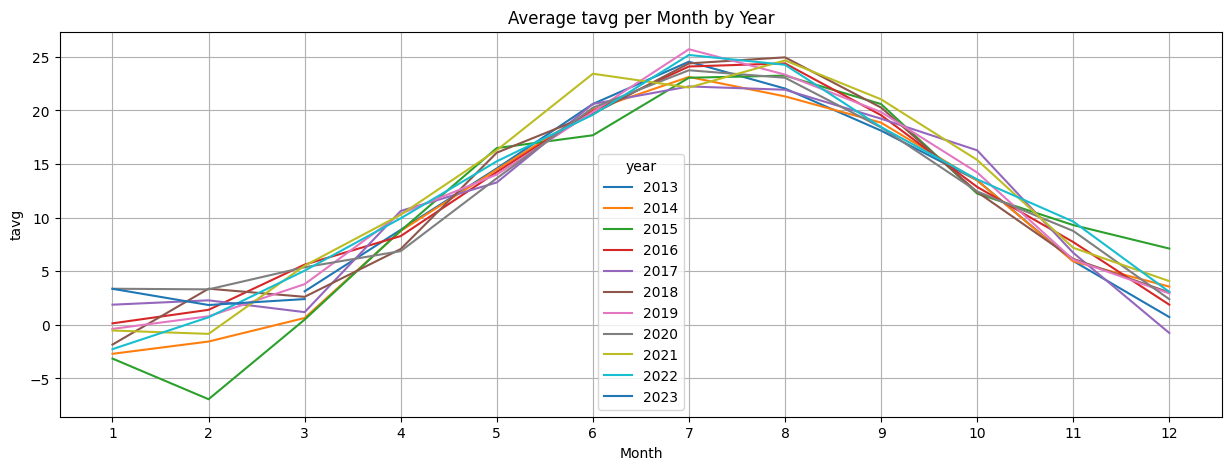

In [9]:
plot_years("tavg")

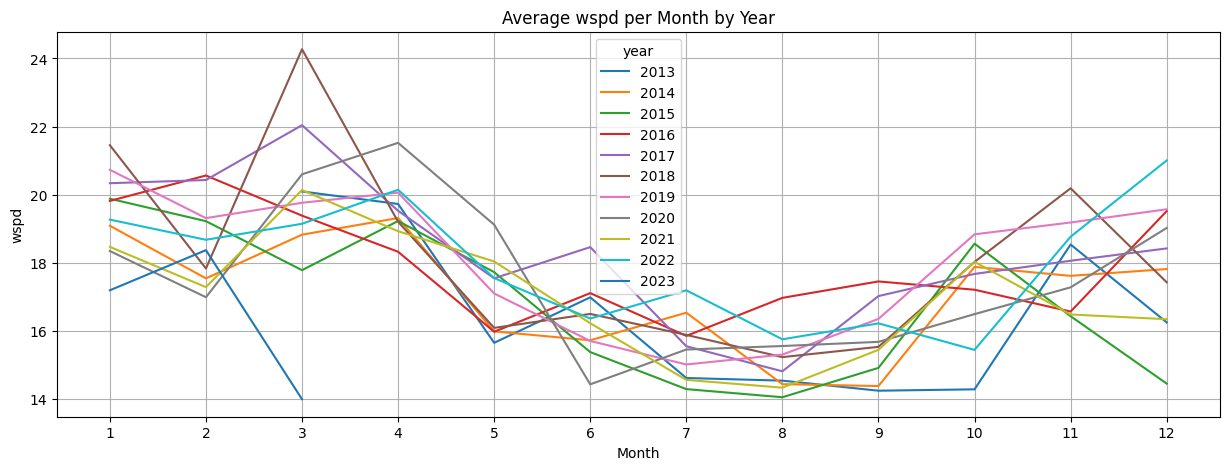

In [10]:
plot_years("wspd")

We selecteren nu alleen de maanden die ook in de taxi-dataset voorkomen

In [11]:
# Select the months and year that are also in the taxi dataset
weather_data["datetime"] = pd.to_datetime(weather_data["time"])
weather_data.drop(columns=["time"], inplace=True)

In [12]:
# Filterr the weather data on the same days as the taxi data
weather_data = weather_data[
    weather_data["datetime"].dt.date.isin(data["datetime"].dt.date.unique())
]   

In [37]:
# Checking if the number of days in the weather data is the same as the taxi data
weather_data["datetime"].dt.date.value_counts()

datetime
2018-11-26    1
2018-12-09    1
2018-12-17    1
2018-12-16    1
2018-12-15    1
2018-12-14    1
2018-12-13    1
2018-12-10    1
2018-12-04    1
2018-11-27    1
2018-12-03    1
2018-12-02    1
2018-12-01    1
2018-11-30    1
2018-11-29    1
2018-11-28    1
2018-12-18    1
Name: count, dtype: int64

We gaan nu de twee datasets samenvoegen op basis van de dag. Hierdoor kunnen we beter inzicht krijgen in de onderlinge correlaties.

In [14]:
# Make the datetime column the same in both datasets
data["datetime"] = pd.to_datetime(data["datetime"].dt.date)

In [15]:
# Merge the datasets
data = data.merge(weather_data, left_on="datetime", right_on="datetime", how="left")    

Nu we voor elke rit de bijbehorende weerdata hebben toegevoegd, kunnen we onderzoeken wat de invloed van het weer is op deze ritten en de hoeveelheid ervan.

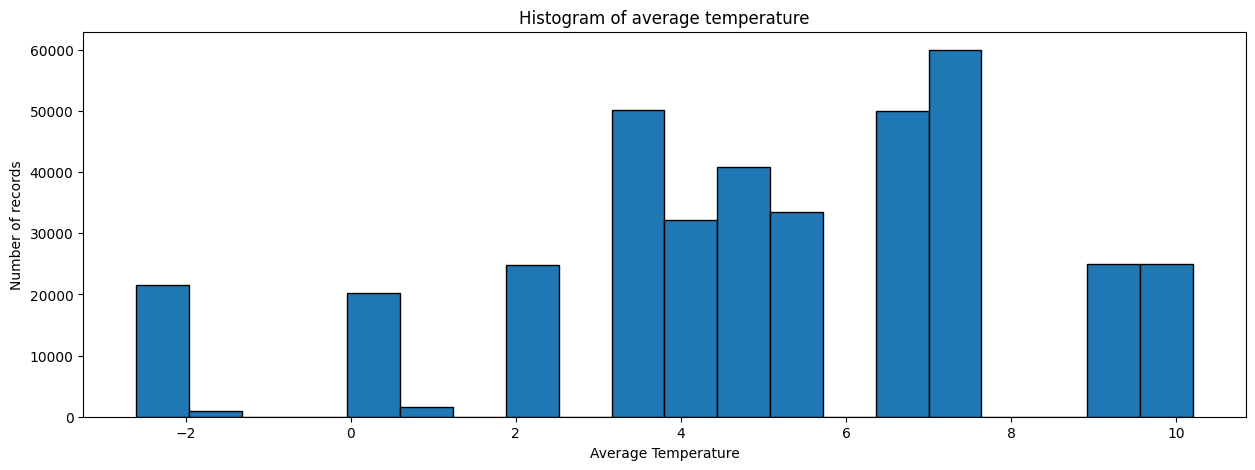

In [26]:
# Plot the average temperature
data["tavg"].plot(kind="hist", bins=20, figsize=(15, 5), edgecolor="black")
plt.title("Histogram of average temperature")
plt.xlabel("Average Temperature")
plt.ylabel("Number of records")
plt.show()

C:\Users\aofie\AppData\Local\Temp\ipykernel_20660\425112912.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data["wdir"].groupby(out).count().plot(kind="bar", figsize=(15, 5))


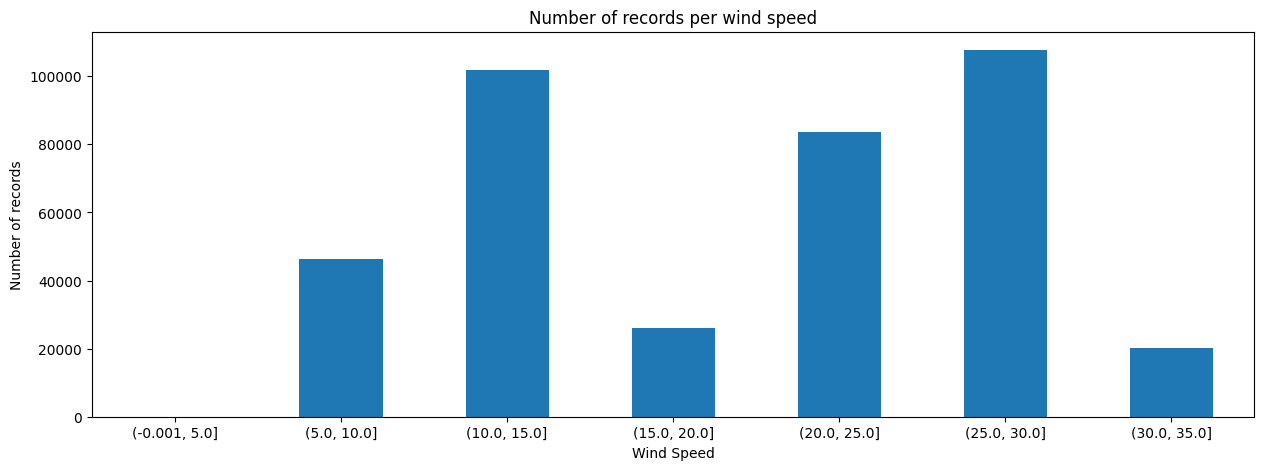

In [18]:
# plotting the amount of records per day for each wind speed
out = pd.cut(data["wspd"], bins=[x for x in range(0, 36, 5)], include_lowest=True)
data["wdir"].groupby(out).count().plot(kind="bar", figsize=(15, 5))
plt.title("Number of records per wind speed")
plt.xticks(rotation=0)
plt.xlabel("Wind Speed")
plt.ylabel("Number of records")
plt.show()

wat we uit de twee grafieken boven ons kunnen weergeven is dat er wel een correlatie zit tussen de hoeveel heid ritten en de wind snelheidd

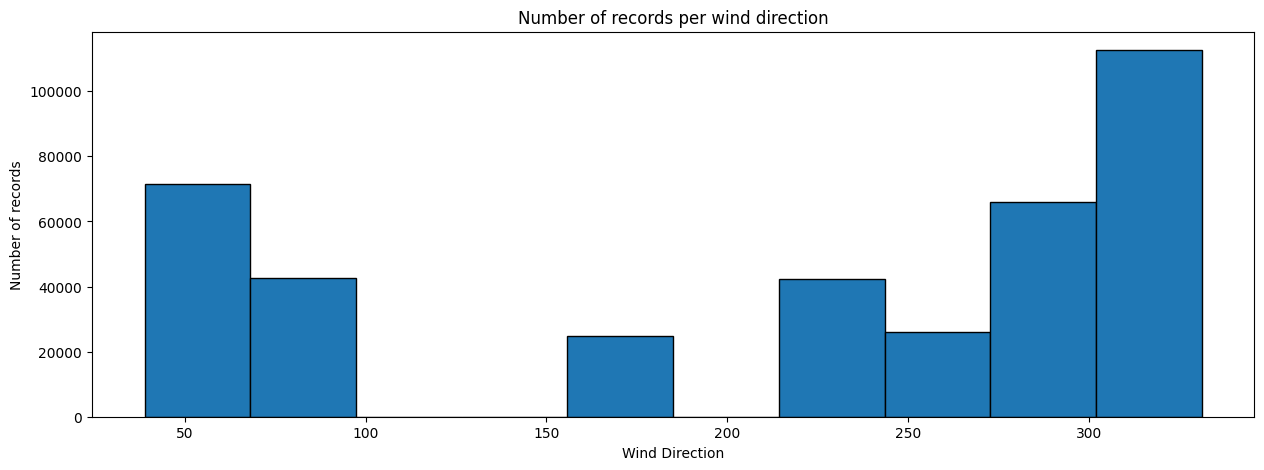

In [36]:
# Plot the number of records per wind direction
data["wdir"].plot(kind="hist", bins=10, figsize=(15, 5), edgecolor="black")
plt.title("Number of records per wind direction")
plt.xticks(rotation=0)
plt.xlabel("Wind Direction")
plt.ylabel("Number of records")
plt.show()

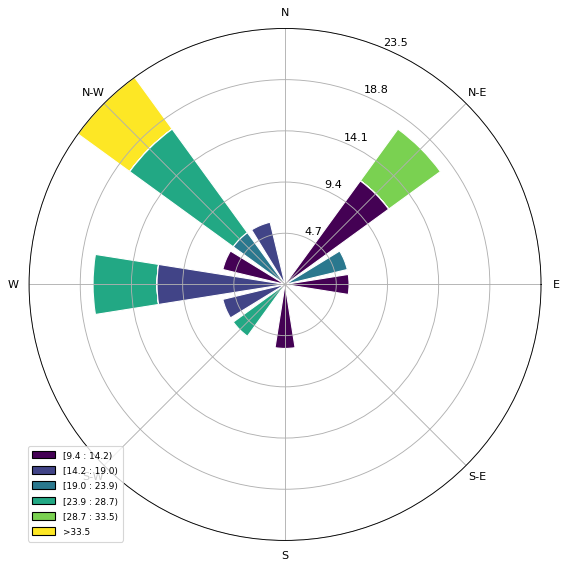

In [ ]:
# Plot the windrose
ax = WindroseAxes.from_ax()
ax.bar(weather_data["wdir"], weather_data["wspd"], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.show()

Wat we hier kunnen waarnemen, is dat er bij zuidelijke wind minder taxiritten plaatsvinden. Bij westelijke wind neemt het aantal ritten toe. Dit komt waarschijnlijk doordat de wind gedurende de dag vaker uit het westen waait, waardoor er meer ritten in die richting worden geregistreerd. Er kan worden aangenomen dat mensen eerder een taxi nemen bij sterkere wind. Dit kan in Amerika echter anders zijn dan in Nederland.

C:\Users\aofie\AppData\Local\Temp\ipykernel_20660\258772776.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data["prcp"].groupby(out_prcp).count().plot(kind="bar", figsize=(15, 5))


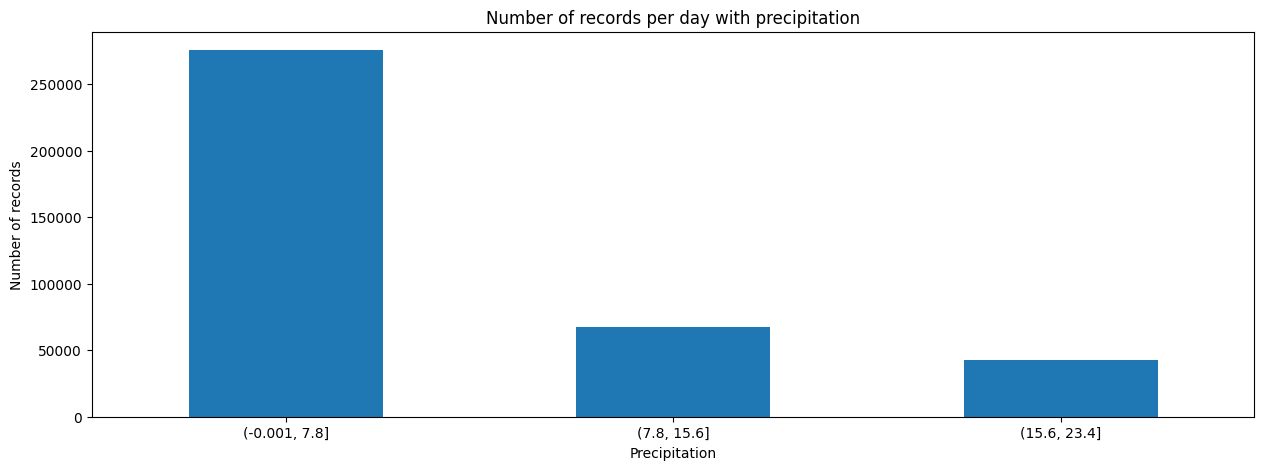

In [20]:
# Plot the number of records per day with precipitation
out_prcp = pd.cut(data["prcp"], bins=[0, 7.8, 7.8*2, 7.8*3], include_lowest=True)
data["prcp"].groupby(out_prcp).count().plot(kind="bar", figsize=(15, 5))
plt.title("Number of records per day with precipitation")
plt.xticks(rotation=0)
plt.xlabel("Precipitation") 
plt.ylabel("Number of records")
plt.show()

De meeste taxiritten vinden plaats bij een neerslag tussen 0,0 mm en 7,8 mm. Dit geldt ook voor de andere categorieën, zoals beschreven op de [site](https://www.kaggle.com/datasets/swaroopmeher/boston-weather-2013-2023/data), waar de kolommen worden toegelicht. Dit betekent dat de meeste taxiritten plaatsvinden bij een minimale neerslag tussen 0,0 en 7,8 mm. Dit kan echter ook te maken hebben met het feit dat hogere neerslaghoeveelheden minder vaak voorkomen, waardoor dit patroon zo in de data wordt weergegeven.

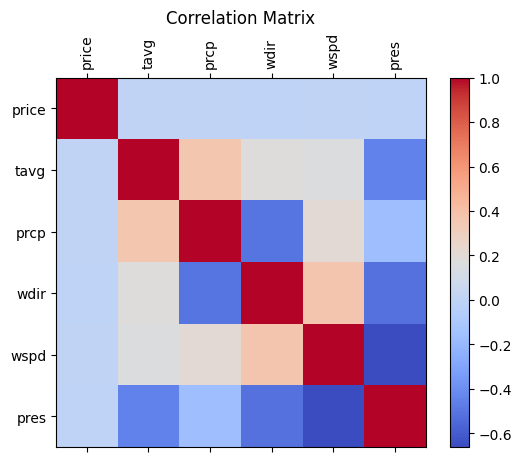

In [21]:
# Create a correlation matrix to see the correlation between the features
correlation_matrix = data[["price", "tavg", "prcp", "wdir", "wspd", "pres"]].corr()
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=0)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.title("Correlation Matrix")
plt.show()

We kunnen hieruit zien dat tussen de price en de weer features geen correlattie te vinden is.

<a id="Conclusie"></a>
## Conclusie

De resultaten geven aan dat bij meer neerslag en een hogere windsnelheid meer mensen de taxi nemen. Dit verband is echter niet significant.

Er is waargenomen dat er op maandag, zondag en dinsdag minder ritten worden gemaakt. Dit zou kunnen komen door een storm op die dagen of andere externe omstandigheden.

Daarnaast is de tijdsduur van de taxi-dataset niet lang genoeg om sterke verbanden tussen het weer en het aantal ritten te vinden, zelfs wanneer deze parallel wordt geanalyseerd met de Boston Weather-dataset.

Andere factoren, zoals evenementen en vakanties, kunnen eveneens invloed hebben op het aantal ritten op een bepaalde dag. Hierdoor is het moeilijk om op basis van zo'n korte tijdsperiode een solide conclusie te trekken.

Verder is er alleen weerdata per dag beschikbaar en niet per uur. In combinatie met het feit dat de taxi-dataset slechts 17 dagen beslaat, is het beschikbare bereik te beperkt om een betrouwbare conclusie te kunnen trekken.

Wat we logisch kunnen beredeneren, is dat mensen bij slecht weer minder snel zelf willen reizen. Omdat deze dataset echter alleen data van november en december bevat, kan dit niet specifiek worden vergeleken met de zomer.

Kort samengevat kunnen we geen sterke correlatie vaststellen tussen het weer en het aantal taxiritten zonder aanvullende taxi/weerdata.
